<a href="https://colab.research.google.com/github/tenorio-vivianesgm/info-theory/blob/master/Aplicacao_Kontoyiannis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating the Directed Information and Testing for Causality
*( I. Kontoyiannis and Maria Skoularidou)*


---





# Introdução
---
O problema de estimar a taxa de informações direcionadas entre dois processos distintos **{Xn}** e **{Yn}** por meio do estimador de plug-in (ou probabilidade máxima) é considerado. Quando o processo conjunto **{(Xn, Yn)}** é uma cadeia de Markov com um determinado comprimento de memória, o estimador de plug-in mostra-se assintoticamente gaussiano e converge na taxa ideal $O(1/\sqrt n)$ sob condições apropriadas; este é o primeiro estimador que foi mostrado para atingir essa taxa. Uma conexão importante é estabelecida entre o problema de estimar a taxa de informação direcionada e o de executar um teste de hipótese para a presença de influência causal entre os dois processos. Sob condições razoavelmente gerais, a hipótese nula, que corresponde à ausência de influência causal, é equivalente ao requisito de que a taxa de informações direcionadas seja igual a zero. Nesse caso, é estabelecido um resultado mais fino, mostrando que o plug-in converge na taxa mais rápida $O(1/n)$ e que é distribuído assintoticamente em $\chi^2$. Isso é comprovado mostrando que esse estimador é igual a (um múltiplo escalar) da estatística clássica da razão de verossimilhança para o teste de hipótese acima. Finalmente, note-se que esses resultados facilitam o desenho de um teste de razão de verossimilhança real para a presença ou ausência de influência causal.

In [ ]:
#@title Cálculo da Informação Direcional Analítica
import math
import numpy as np

theta1 = 0.1
theta10 = 0.3
theta00 = 0.5
D = 2
p = 0.1

pcond = np.zeros((12,1))
pconj = np.zeros((6,1))
pi1=theta00/(theta00+(1-theta1)*theta00+(1-theta1)*(1-theta10))
pi10=pi1*(1-theta1)
pi00=pi1*(1-theta1)*(1-theta10)/theta00

pcond[0]=(1-p)*(1-theta00)/((1-p)*(1-theta00)+p*theta00)
pcond[1]=(1-p)*(1-theta10)/((1-p)*(1-theta10)+p*theta10)
pcond[2]=(1-p)*(1-theta1)/((1-p)*(1-theta1)+p*theta1)
pcond[3]=(p)*(1-theta00)/((p)*(1-theta00)+(1-p)*theta00)
pcond[4]=(p)*(1-theta10)/((p)*(1-theta10)+(1-p)*theta10)
pcond[5]=(p)*(1-theta1)/((p)*(1-theta1)+(1-p)*theta1)
pcond[6]=(p)*(theta00)/((p*theta00)+(1-p)*(1-theta00))
pcond[7]=(p)*(theta10)/((p*theta10)+(1-p)*(1-theta10))
pcond[8]=(p)*(theta1)/((p*theta1)+(1-p)*(1-theta1))
pcond[9]=(1-p)*(theta00)/((1-p)*(theta00)+p*(1-theta00))
pcond[10]=(1-p)*(theta10)/((1-p)*(theta10)+p*(1-theta10))
pcond[11]=(1-p)*(theta1)/((1-p)*(theta1)+p*(1-theta1))

#print('pcond = ', pcond)

pconj[0]=(1-theta00)*pi00*(1-p)+theta00*pi00*p
pconj[1]=(1-theta10)*pi10*(1-p)+theta10*pi10*p
pconj[2]=(1-theta1)*pi1*(1-p)+theta1*pi1*p
pconj[3]=(1-theta00)*pi00*p+theta00*pi00*(1-p)
pconj[4]=(1-theta10)*pi10*p+theta10*pi10*(1-p)
pconj[5]=(1-theta1)*pi1*p+theta1*pi1*(1-p)

#print('pconj = ', pconj)

h_causal_cond = -(pconj[0]*(pcond[0]*math.log2(pcond[0]) + pcond[6]*math.log2(pcond[6]))) - (pconj[1]*(pcond[1]*math.log2(pcond[1]) + pcond[7]*math.log2(pcond[7])))- (pconj[2]*(pcond[2]*math.log2(pcond[2]) + pcond[8]*math.log2(pcond[8])))- (pconj[3]*(pcond[3]*math.log2(pcond[3]) + pcond[9]*math.log2(pcond[9]))) - (pconj[4]*(pcond[4]*math.log2(pcond[4]) + pcond[10]*math.log2(pcond[10]))) - (pconj[5]*(pcond[5]*math.log2(pcond[5]) + pcond[11]*math.log2(pcond[11])))

#print('h_cond_causal', h_causal_cond)

h_X=-pi00*(theta00*math.log2(theta00)+(1-theta00)*math.log2(1-theta00))-pi10*(theta10*math.log2(theta10)+(1-theta10)*math.log2(1-theta10))-pi1*(theta1*math.log2(theta1)+(1-theta1)*math.log2(1-theta1))

#print('h_X = ', h_X)

di_analytical=h_X-h_causal_cond

print('di_analytical = ',di_analytical)

di_analytical =  [0.40835057]


In [ ]:
#@title Função de calculo da Entropia Conjunta
def JointEntropy_byVivi(a):
  import pandas as pd
  import itertools
  from scipy.stats import chi2_contingency
  from scipy.stats import chi2
  
  dim = a.shape

  m = np.size(a,1)
     
  idx = ['c{}'.format(i) for i in range(1, len(a)+1)]

  if m == 3:
    y = a[:,0]    
    y_k = a[:,1]    
    y_k2 = a[:,2]    
    df1 = pd.DataFrame({'y':y,'y_k':y_k, 'y_k2':y_k2},index=idx,)
    mytable = df1.groupby(['y','y_k', 'y_k2']).size().reset_index().rename(columns={0:'count'})
    Alphabet = df1.groupby(['y','y_k', 'y_k2']).sum()
  elif m == 4:
      y_k = a[:,0]
      y_k2 = a[:,1]
      x_k = a[:,2]
      x_k2 = a[:,3]
      df1 = pd.DataFrame({'y_k':y_k,'y_k2':y_k2, 'x_k':x_k, 'x_k2':x_k2},index=idx,)
      mytable = df1.groupby(['y_k','y_k2', 'x_k', 'x_k2']).size().reset_index().rename(columns={0:'count'})
      Alphabet = df1.groupby(['y_k','y_k2', 'x_k', 'x_k2']).sum()
  elif m == 5:
    y = a[:,0]
    y_k = a[:,1]
    y_k2 = a[:,2]
    x_k = a[:,3]
    x_k2 = a[:,4]
    df1 = pd.DataFrame({'y':y,'y_k':y_k, 'y_k2':y_k2, 'x_k':x_k, 'x_k2':x_k2},index=idx,)
    mytable = df1.groupby(['y','y_k', 'y_k2', 'x_k', 'x_k2']).size().reset_index().rename(columns={0:'count'})
    Alphabet = df1.groupby(['y','y_k', 'y_k2', 'x_k', 'x_k2']).sum()
  else: 0

  P = np.zeros((len(Alphabet),1))
  for column in mytable[['count']]:
    P = mytable[column]
    Freq = P.values

  Prob = Freq / Freq.sum()

  for i in range(0, len(Prob)):
    aux_P = Prob[i]
    aux = aux_P * math.log2(aux_P)
    aux = np.vstack([aux])
  H_conjunta = -aux.sum()

  return H_conjunta

# Cálculo da Informação direcional - Desenvolvimento matemático
\begin{equation}
DI_n= I_n( X \rightarrow Y) = \frac{1}{n}\sum_{i=1}^n[H(Y_i|Y^{i-1})-H(Y_i|Y^{i-1},X^i)]
=\dfrac{1}{n}\sum_{i=1}^n[H(Y_i|Y_{i-k}^{i-1})-H(Y_i|Y_{i-k}^{i-1},X_{i-k}^{i})]
\end{equation}

1o termo:
\begin{equation}
H(Y_i|Y_{i-k}^{i-1})= 
H(A|B)=H(A,B)-H(B)
\end{equation}
2o termo:
\begin{equation}
H(Y_i|Y_{i-k}^{i-1},X_{i-k}^{i}) = 
H(A|C)=H(A,C)-H(C)
\end{equation}

em que $A = Y_i$, $B = Y_{i-k}^{i-1}$ $C = Y_{i-k}^{i-1},X_{i-k}^{i}$

In [ ]:
#@title Check pyitlib
!pip install pyitlib

  Created wheel for pyitlib: filename=pyitlib-0.2.2-cp36-none-any.whl size=28502 sha256=aa8bc8fea887a9c6f9c03eb83492a55f25d69437be41ca3f2a73229d0edf9db9
  Stored in directory: /root/.cache/pip/wheels/1c/f8/41/f4b4e777dd6ea714f2c4900367fb479e9fca0eb000c46e73f3
Successfully built pyitlib


In [ ]:
#@title Calculo da Informação Direcional
# A = Y_{i}, B = Y_{-k}^{-1}, C = X_{-k}^0
def calculo_DI(x,y):
  from scipy.stats import entropy
  from pyitlib import discrete_random_variable as drv

  memory = 2

  N=len(x)

  #Inicialização das matrizes
  A=np.zeros((N-memory,1))  
  B=np.zeros((N-memory,memory))
  C=np.zeros((N-memory,memory))

  for i in range(0,N-memory):
    A[i] = y[i+memory].T
    B[i,:] = y[i:i-1+memory].T
    C[i,:] = x[i:i+memory].T

    
  matrix_AB = np.concatenate((A, B), axis=1)
  matrix_ABC = np.concatenate((matrix_AB, C), axis=1)
  matrix_BC = np.concatenate((B, C), axis=1)

  primeiro_termo = JointEntropy_byVivi(matrix_AB) - drv.entropy(B, base=2)
  segundo_termo = JointEntropy_byVivi(matrix_ABC) - JointEntropy_byVivi(matrix_BC)

  info_direcional = primeiro_termo - segundo_termo

  return info_direcional[0]  
   

In [ ]:
#@title Realizações

idx = range(0,50)
size = len(idx)
N = 10000
di_total = np.zeros((size,1))

for trials in idx:
  theta1 = 0.1
  theta10 = 0.3
  theta00 = 0.5
  D = 2
  p = 0.1
  x = np.ones((N,1))
  y = np.ones((N,1))

  for i in range(2, len(x)):
    if x[i-1]==1:
      x[i]= np.random.binomial(1,theta1,1)
    elif x[i-2]==0:
      x[i]=np.random.binomial(1,theta00,1)
    else:
      x[i]=np.random.binomial(1,theta10,1)               
    for j in range(1,N):
      if x[j]==0:
        y[j] = np.random.random(1) <= p
      else:
        y[j] = np.random.random(1) <= (1-p)
  print('Trial atual = ',trials)  
  di_realizacoes = calculo_DI(x,y)
  di_total[trials] = di_realizacoes

Trial atual =  0
Trial atual =  1
Trial atual =  2
Trial atual =  3
Trial atual =  4
Trial atual =  5
Trial atual =  6
Trial atual =  7
Trial atual =  8
Trial atual =  9
Trial atual =  10
Trial atual =  11
Trial atual =  12
Trial atual =  13
Trial atual =  14
Trial atual =  15
Trial atual =  16
Trial atual =  17
Trial atual =  18
Trial atual =  19
Trial atual =  20
Trial atual =  21
Trial atual =  22
Trial atual =  23
Trial atual =  24
Trial atual =  25
Trial atual =  26
Trial atual =  27
Trial atual =  28
Trial atual =  29
Trial atual =  30
Trial atual =  31
Trial atual =  32
Trial atual =  33
Trial atual =  34
Trial atual =  35
Trial atual =  36
Trial atual =  37
Trial atual =  38
Trial atual =  39
Trial atual =  40
Trial atual =  41
Trial atual =  42
Trial atual =  43
Trial atual =  44
Trial atual =  45
Trial atual =  46
Trial atual =  47
Trial atual =  48
Trial atual =  49


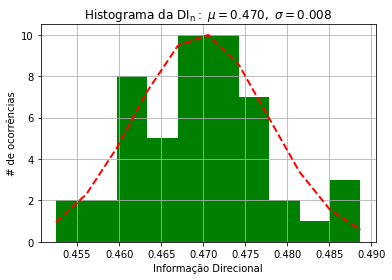

In [ ]:
#@title Histograma
import scipy
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab


#plt.hist(di_total, bins=10)

#mu, sigma = scipy.stats.norm.fit(di_total)


# best fit of data
(mu, sigma) = scipy.stats.norm.fit(di_total)

# the histogram of the data
n, bins, patches = plt.hist(di_total,facecolor='green')

# add a 'best fit' line
y = scipy.stats.norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y/5, 'r--', linewidth=2)

#plot
plt.xlabel('Informação Direcional')
plt.ylabel('# de ocorrências')
plt.title(r'$\mathrm{Histograma\ da\ DI_n:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()



In [ ]:
#@title Teste de Hipotese

from scipy.stats.distributions import chi2

l = 2
m = 2
k = 2
dof = np.power(l,k)*(np.power(m,(k+1))-1)*(l-1)
print('Graus de liberdade = ',dof)
percentil = chi2.ppf(0.95, df=dof)
print('Percentil = ',percentil)
estimation = di_total * 2 * N

if all(estimation > percentil):
  print('Podemos rejeitar a hipótese nula - Há causalidade!')
else: 
  print('Não há causalidade.')


Graus de liberdade =  28
Percentil =  41.33713815142739
Podemos rejeitar a hipótese nula - Há causalidade!
